 # ALGORITMO BAYESIAN BELIEF NETWORK (BBN)

#Descripción:

Es un modelo gráfico probabilístico que se utiliza para representar y razonar sobre relaciones de dependencia probabilística entre un conjunto de variables. Estas redes son especialmente útiles en la modelización y toma de decisiones en situaciones inciertas o donde se dispone de datos incompletos.
* En un BBN, se definen varias variables aleatorias que representan aspectos de un sistema o un problema. Estas variables pueden ser discretas o continuas y se utilizan para representar información relevante.
* Cada variable aleatoria se representa como un nodo en el gráfico. Estos nodos están interconectados mediante arcos dirigidos que indican las dependencias probabilísticas entre las variables.
*Cada nodo en un BBN tiene asociada una tabla de probabilidades condicionales que describe la probabilidad de que la variable tome un valor específico dada la información de sus nodos padres (las variables de las que depende directamente).
* Una de las principales ventajas de las BBN es su capacidad para realizar inferencia probabilística. Dado un conjunto de observaciones y evidencias sobre algunas variables, se puede utilizar la red para calcular probabilidades posteriores sobre otras variables no observadas. Esto es útil para tomar decisiones basadas en la incertidumbre.



#Bibtext y Referencias

@inproceedings{cheng2001learning,
  title={Learning bayesian belief network classifiers: Algorithms and system},
  author={Cheng, Jie and Greiner, Russell},
  booktitle={Advances in Artificial Intelligence: 14th Biennial Conference of the Canadian Society for Computational Studies of Intelligence, AI 2001 Ottawa, Canada, June 7--9, 2001 Proceedings 14},
  pages={141--151},
  year={2001},
  organization={Springer}
}

# Herramientas utilizadas:
* Obtención de información:
* https://www.perplexity.ai/search/a96a2798-e2da-470b-a0ec-48a3f67c76ce?s=u

#Tipo de Modelo:
* MODELO DE APRENDIZAJE: Supervisado
* POR PARAMETROS: Parametrico
* DATOS APRENDIZAJE: Offline
* RESULTADOS DEL ENTRENAMIENTO: Basado en modelos

#Supuestos y Restricciones

#Supuestos

* Uno de los supuestos clave es la independencia condicional. En una BBN, se asume que una variable es condicionalmente independiente de todas las demás variables en el grafo.
* La estructura del grafo subyacente de una BBN se basa en la suposición de que existe una relación causal entre las variables.

#Restricciones
* Las BBNs asumen relaciones lineales entre las variables.
* Las BBNs generalmente trabajan mejor con variables que tienen conjuntos discretos de valores, ya que se basan en tablas de probabilidad condicional discretas.
* El tamaño de la tabla de probabilidad condicional puede crecer exponencialmente con el número de variables y sus estados, lo que puede hacer que las BBNs sean computacionalmente costosas de calcular y requerir grandes conjuntos de datos para estimar parámetros de manera confiable.


In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [2]:
#Creamos una red bayesiana vacia

modelo_bbn = BayesianNetwork()

In [3]:
# Definir las variables (nodos) en la red y sus relaciones
modelo_bbn.add_nodes_from(["A", "B", "C"])
modelo_bbn.add_edges_from([("A", "B"), ("A", "C")])

In [4]:
# Definir las Tablas de Probabilidad Condicional (CPD) para cada variable
cpd_A = TabularCPD(variable="A", variable_card=2, values=[[0.6], [0.4]])
cpd_B = TabularCPD(variable="B", variable_card=2, values=[[0.2, 0.7], [0.8, 0.3]], evidence=["A"], evidence_card=[2])
cpd_C = TabularCPD(variable="C", variable_card=2, values=[[0.4, 0.9], [0.6, 0.1]], evidence=["A"], evidence_card=[2])


In [5]:
# Asociar las CPDs a las variables en el modelo
modelo_bbn.add_cpds(cpd_A, cpd_B, cpd_C)

In [6]:
# Comprobar si la red es válida
valida = modelo_bbn.check_model()
print("¿La red es válida?", valida)

¿La red es válida? True


In [7]:
# Realizar inferencia en la red
inference = VariableElimination(modelo_bbn)
resultado = inference.query(variables=["B"], evidence={"A": 1})
print(resultado)

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.7000 |
+------+----------+
| B(1) |   0.3000 |
+------+----------+


In [8]:
# Calcular la probabilidad condicional P(B=1 | A=1)
probabilidad_B_dado_A = resultado.values[1]
print("P(B=1 | A=1) =", probabilidad_B_dado_A)

P(B=1 | A=1) = 0.3


In [11]:
import networkx as nx
bbn = nx.DiGraph()

In [12]:
bbn.add_node("cpd_A")
bbn.add_node("cpd_B")
bbn.add_node("cpd_C")

In [18]:
# Agregar relaciones (arcos)
bbn.add_edge("cpd_A", "cpd_B")
bbn.add_edge("cpd_C", "cpd_A")
bbn.add_edge("cpd_B", "cpd_C")

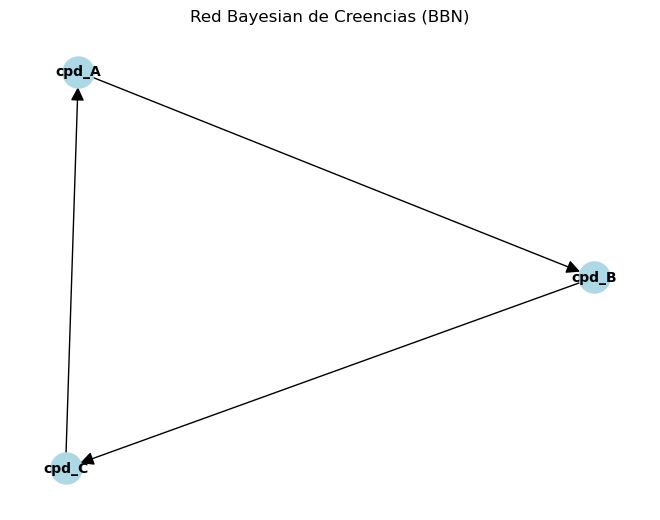

In [19]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(bbn) 
nx.draw(bbn, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
plt.title("Red Bayesian de Creencias (BBN)")
plt.show()